# <center>Explore AI Academy Team 18 Project</center>
## <center>Insurance Claims Modelling</center>


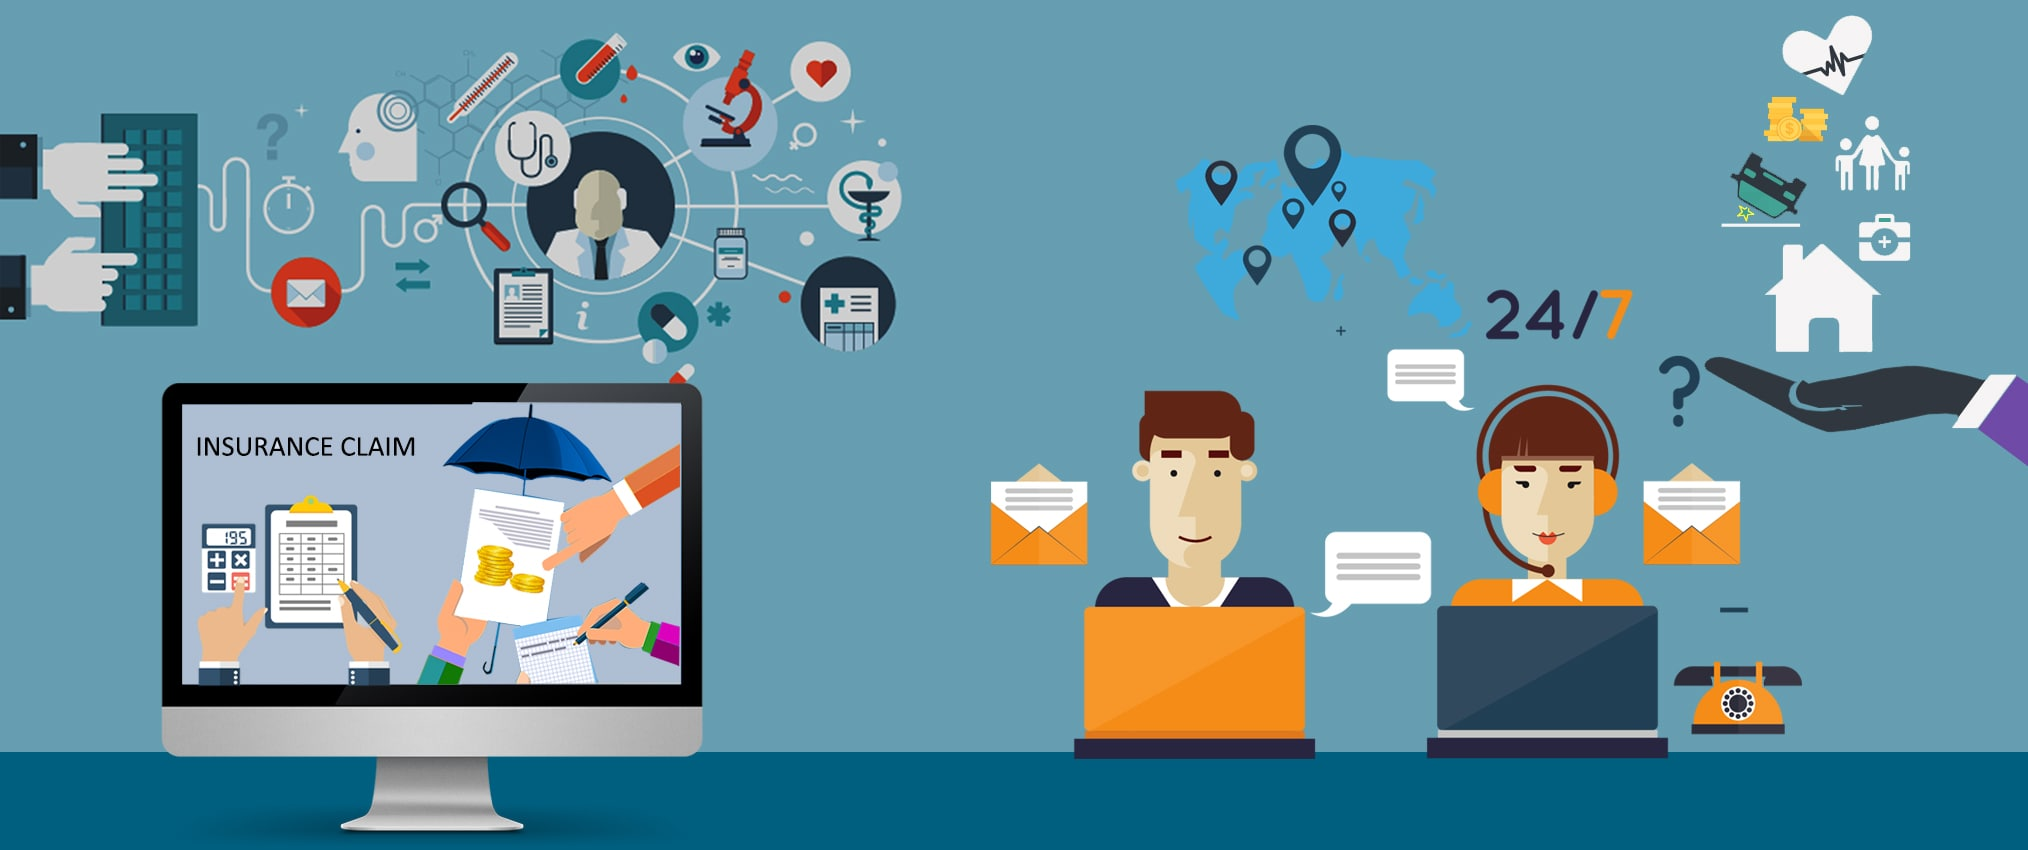

<a id='Table_Contents'></a><br>
# Table of Contents
1. [Introduction](#intro)
    * Problem Statement
 
 
2. [Data](#imports_data)
 * Importing Packages
 * Loading Data
 * Dataset Description
 * Checking for Missing Values
 
3. [Exploratory Data Analysis](#EDA)
    * Data Cleaning
    * Correlation of Features
    * Claims Count Distribution
    * Categorical Features
    * Numerical Features

4. [Data Preprocessing](#feat_eng)
    * Loading Data
    * Dropping Unnecessary Columns
    * Dealing With Missing Values
    * Dropping Redundant Columns
    * Feature Engineering
    * Dropping Date Columns
    * Extracting Vehicle Model First Name
    * Selecting Top Categories and Replacing Rest With 'Other'
    * Binning of Numerical Features
    * One Hot Encoding of Categorical Features

5. [Model Building](#model)
    * Splitting Features and Target Variable
    * Splitting into Train, Val, and Test Sets
    * Scaling Numerical Features
    * Fitting Linear Regression Model
    * Fitting XGBoost Model
    * XGBoost Model Hyperparameter Tuning
    * Final Model Fitting
    
6. [Conclusion](#conclusion)
    * Collaborators
 
7. [References](#ref)




<a id='intro'></a><br>
# 1. Introduction
[Back to Table of Contents](#Table_Contents)


## Problem Statement

The aim of this project is to predict the total claim amount per exposure, for specific risk profiles. A risk profile describes a policyholder (someone who is a client and owns a policy at the insurer), things like age, gender, marital status, etc. These attributes can all be found in the dataset used in this project. The reason for doing this is so that the predicted claim can be used to calculate a premium for new applicants, based on their predicted risk. This way the insurer maximises profits by charging higher premiums for higher risk profiles. It is important to consider however that accompanying a higher premium, the insurer should maintain sensibility in deciding on a premium and still outcompete competitor insurers, which make business rules essential. 

<a id='imports_data'></a><br>
# 2. Data
[Back to Table of Contents](#Table_Contents)

## Importing Packages

In [135]:
import pandas as pd
import numpy as np
from math import sqrt
from datetime import datetime
from time import time
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display_html 
from IPython.core.display import HTML
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = 100

import re
import pickle
from sklearn.linear_model import LinearRegression # Linear regression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score


## Loading Data

We first load the data and inspect its head.

In [2]:
df = pd.read_excel('DataSet.xlsx')
#df.head()

In [3]:
# Data shape
df.shape

(262990, 45)

The data contains 262990 rows and 45 columns.

In [4]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262990 entries, 0 to 262989
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   PolicyId                              262990 non-null  int64         
 1   ClaimId                               27478 non-null   float64       
 2   SumTotalClaimAmount                   27392 non-null   float64       
 3   CountTotalClaimAmount                 27478 non-null   float64       
 4   PremiumSum                            262750 non-null  float64       
 5   CasePremiumSum                        262750 non-null  float64       
 6   PaymentDueDate                        262750 non-null  datetime64[ns]
 7   TotalPremiumPaymentCount              262750 non-null  float64       
 8   PreviousInsurerExcess                 262963 non-null  float64       
 9   PreviousInsurerPremium                262961 non-null  floa

We observe that there are some columns with missing values. 

In [5]:
# Data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PolicyId,262990.0,1.084961e+07,51720.661654,1.076784e+07,1.080422e+07,1.084769e+07,1.089272e+07,1.095790e+07
ClaimId,27478.0,1.010507e+07,15069.963591,1.007378e+07,1.009240e+07,1.010566e+07,1.011831e+07,1.012987e+07
SumTotalClaimAmount,27392.0,4.059307e+04,65213.503869,0.000000e+00,3.415500e+03,1.391817e+04,4.461965e+04,1.754000e+06
CountTotalClaimAmount,27478.0,1.256787e+00,0.574605,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
PremiumSum,262750.0,4.589583e+03,3538.634556,0.000000e+00,1.988050e+03,3.568235e+03,6.351193e+03,4.182255e+04
CasePremiumSum,262750.0,3.709207e+03,3718.507791,0.000000e+00,7.191375e+02,2.743360e+03,5.620938e+03,4.182255e+04
TotalPremiumPaymentCount,262750.0,4.623604e+00,4.066673,0.000000e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.400000e+01
PreviousInsurerExcess,262963.0,2.923134e+03,6031.299346,-1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+03,8.000000e+05
PreviousInsurerPremium,262961.0,5.767832e+02,654.862704,-1.700000e+03,0.000000e+00,4.580000e+02,1.070000e+03,2.300000e+04
IsMemberPayer,262990.0,9.662154e-01,0.180675,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# Percentage missing values
df.isnull().mean().sort_values(ascending=False)*100

Employer                                97.229552
SumTotalClaimAmount                     89.584395
ClaimId                                 89.551694
CountTotalClaimAmount                   89.551694
PolicyEndDate                           48.745580
DaysSinceInception                      48.745580
MonthsSinceInception                    48.745580
Area                                    25.515419
SumAssured                              15.992243
IndustryType                             1.570782
EmploymentType                           1.009924
Occupation                               0.854025
TotalPremiumPaymentCount                 0.091258
PaymentDueDate                           0.091258
CasePremiumSum                           0.091258
PremiumSum                               0.091258
PreviousInsurerPremium                   0.011027
PreviousInsurerExcess                    0.010267
Gender                                   0.003042
PolicyStatus                             0.002281


We observe that Employer, SumTotalClaimAmount, ClaimId and CountTotalClaimAmount columns all have a high percentage of missing values (over 89%). PolicyEndDate, DaysSinceInception and MonthsSinceInception have 48% missing values while Area has 25% and SumAssured has 15%. These columns will be further explored in the data preprocessing section of the project.                                                                                                                                                                                                         

<a id='EDA'></a><br>
# 3. Exploratory Data Analysis
[Back to Table of Contents](#Table_Contents)
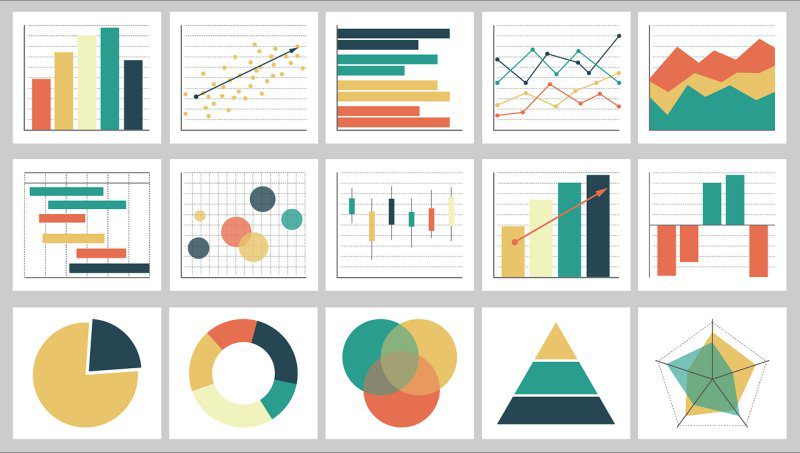

In this section we perform exploratory data analysis on the data to gain a better understanding of the features and the relationships between them. We will employ both statistical and visualisation methods of EDA.

## Data Cleaning 
We perform the following basic data cleaning before embarking on the EDA:
1. Drop the last column as it is irrelevant
2. Impute NaN values in the 'SumTotalClaimAmount' and 'CountTotalClaimAmount' columns with 0
3. Create an 'Age' column using 'BirthDt'

In [7]:
#Make copy
df_copy = df.copy()

#Drop the last column
df_copy = df_copy.iloc[: , :-1]


In [8]:
#Impute NaNs with 0 for 'SumTotalClaimAmount' and 'CountTotalClaimAmount' columns
df_copy['SumTotalClaimAmount'].fillna(0, inplace=True)
df_copy['CountTotalClaimAmount'].fillna(0, inplace=True)


In [9]:
#Create 'Age' column
now = pd.Timestamp('now')
df_copy['BirthDt'] = pd.to_datetime(df_copy['BirthDt'], format='%m%d%y')    # 1
df_copy['BirthDt'] = df_copy['BirthDt'].where(df_copy['BirthDt'] < now, df_copy['BirthDt'] -  np.timedelta64(100, 'Y'))   # 2
df_copy['Age'] = (now - df_copy['BirthDt']).astype('<m8[Y]')

## Correlation of Features
We explore the correlation of the features to the target variable and to each other.

In [10]:
#Correlation of features
columns = list(df_copy.columns)
irrelevant_feat = ['PolicyId', 'ClaimId ', 'VehicleYear']
relevant_feat = [x for x in columns if x not in irrelevant_feat]
df_copy[relevant_feat].corr()

,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,IsMemberPayer,CubicCapacity,Cyl,Kilowatts,MonthsSinceInception,DaysSinceInception,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,Age
SumTotalClaimAmount,1.000000,0.553535,0.062766,0.062803,0.032719,0.016626,0.025488,0.002995,-0.011273,-0.015999,0.008464,0.026448,0.026788,0.058844,0.058158,0.013615,-0.041177,0.018144,-0.001243,0.011733,-0.046541
CountTotalClaimAmount,0.553535,1.000000,0.219611,0.224151,0.199623,0.013259,0.028129,0.005359,-0.018159,-0.018181,0.009737,0.158876,0.160093,0.045395,0.053107,0.054557,0.025593,-0.020909,0.023299,0.027678,-0.054127
PremiumSum,0.062766,0.219611,1.000000,0.929425,0.779827,0.066375,0.157109,0.009417,0.029850,-0.024453,0.110891,0.533948,0.534514,0.326275,0.303627,0.346171,0.177192,0.034578,0.100676,0.073290,-0.132190
CasePremiumSum,0.062803,0.224151,0.929425,1.000000,0.883102,0.045597,0.107036,-0.000763,0.017296,-0.025852,0.082787,0.610786,0.612088,0.252367,0.259096,0.387786,0.293609,0.014279,0.117991,0.077908,-0.087456
TotalPremiumPaymentCount,0.032719,0.199623,0.779827,0.883102,1.000000,-0.004766,-0.006639,-0.012016,-0.001139,0.002072,-0.000577,0.675016,0.676747,-0.016324,0.009930,0.193603,0.293913,-0.069833,0.145511,0.078316,0.021549
PreviousInsurerExcess,0.016626,0.013259,0.066375,0.045597,-0.004766,1.000000,0.442726,0.026939,-0.062386,-0.054648,-0.025591,0.011308,0.011492,0.117590,0.120901,0.081235,-0.013035,0.083602,-0.041376,-0.010484,-0.126469
PreviousInsurerPremium,0.025488,0.028129,0.157109,0.107036,-0.006639,0.442726,1.000000,0.045403,-0.054820,-0.062145,0.020394,0.017792,0.018161,0.279245,0.169071,0.114564,-0.036698,0.002855,-0.039142,-0.016626,-0.152371
IsMemberPayer,0.002995,0.005359,0.009417,-0.000763,-0.012016,0.026939,0.045403,1.000000,-0.015671,-0.007861,-0.008351,-0.006163,-0.006256,0.014238,0.016676,-0.004235,-0.027872,0.002051,-0.077356,-0.052299,-0.072802
CubicCapacity,-0.011273,-0.018159,0.029850,0.017296,-0.001139,-0.062386,-0.054820,-0.015671,1.000000,0.714084,0.765137,-0.007508,-0.007432,0.243099,0.042146,0.013468,-0.028300,-0.046639,0.037027,-0.020122,0.234275
Cyl,-0.015999,-0.018181,-0.024453,-0.025852,0.002072,-0.054648,-0.062145,-0.007861,0.714084,1.000000,0.544440,-0.004858,-0.004612,0.023766,-0.079592,-0.085160,-0.041439,-0.070697,0.030240,-0.006069,0.145009


Next we create a correlation heatmap of the features

<AxesSubplot:>

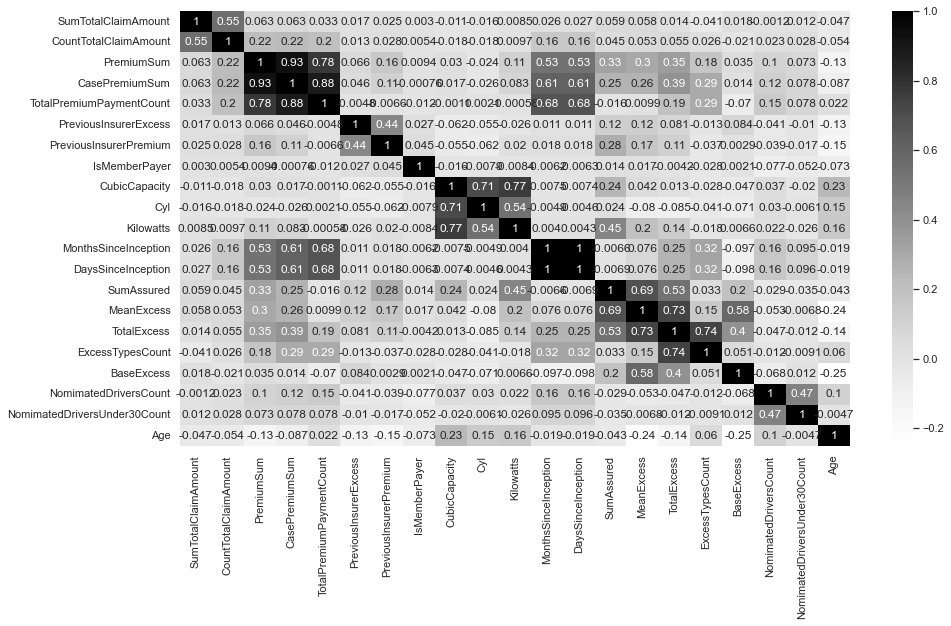

In [11]:
#Correlation heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_copy[relevant_feat].corr(), annot=True, cmap='Greys')

From the correlation heatmap above we observe the following:
1. The target variable 'SumTotalClaimAmount' is not highly correlated to any of the features
2. Strong correlation between 'PremiumSum' and 'CasePremiumSum', 'PremiumSum' and 'TotalPremiumPaymentCount', 'CasePremiumSum' and 'TotalPremiumPaymentCount', 'CubicCapacity' and 'Killowatts', 'MeanExcess' and 'TotalExcess'
3. Moderate correlation between 'SumTotalClaimAmount' and 'CountTotalClaimAmount', 'PremiumSum' and 'MonthsSinceInception', 'PremiumSum' and 'DaysSinceInception', 'PremiumSum' and 'SumAssured', 'PremiumSum' and 'MeanExcess', 'PremiumSum' and 'TotalExcess', 'CasePremiumSum' and 'MonthsSinceInception', 'CasePremiumSum' and 'DaysSinceInception', 'CasePremiumSum' and 'TotalExcess'
3. Weak correlation between all the other features

## Claims Count Distribution
We create a count plot to investigate how the number of claims per customer is distributed

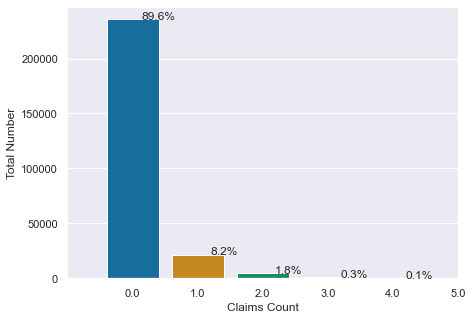

In [12]:
# Claims count distribution
sns.set_style("darkgrid")
plt.figure(figsize=(7,5))
ax = sns.countplot(x ='CountTotalClaimAmount', data = df_copy, palette='colorblind')
plt.xlabel('Claims Count')
plt.ylabel('Total Number')
total = float(len(df_copy))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlim([-1, 5])
plt.show()


We observe that majority of customers (89.6%) had zero claims, 8.2% had one claim, 1.8% had two claims, 0.3% had three claims and 0.1% had four claims.

## Categorical Features 
Next we explore how categorical features such as EmploymentType, Gender affect the claim amount

### Employment Type

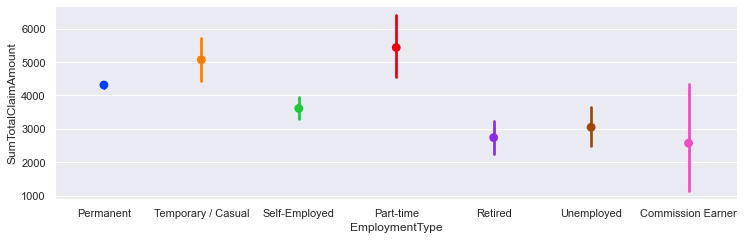

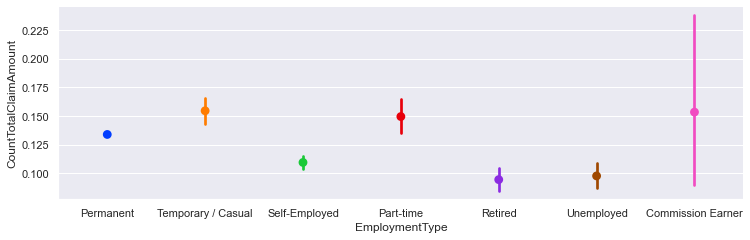

In [13]:
#Claims amount and claims count distribution per employment type
sns.set_theme(style="darkgrid")
sns.catplot(x="EmploymentType", y="SumTotalClaimAmount", data=df_copy, kind='point', height=3.5, aspect=3, palette='bright')
sns.catplot(x="EmploymentType", y="CountTotalClaimAmount", data=df_copy, kind='point', height=3.5, aspect=3, palette='bright')


We observe that part-time employees had the highest claim amount with commission earners having the least claim amount. However, commision earners had the highest claim count with retired employees having the least claim count. 

### Gender and Marital Status

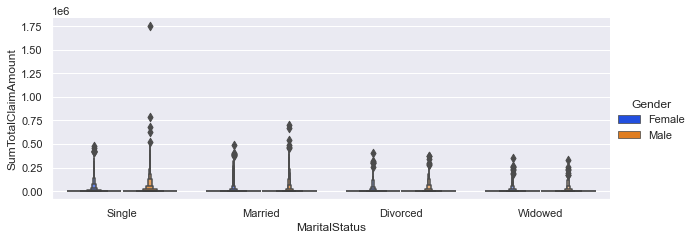

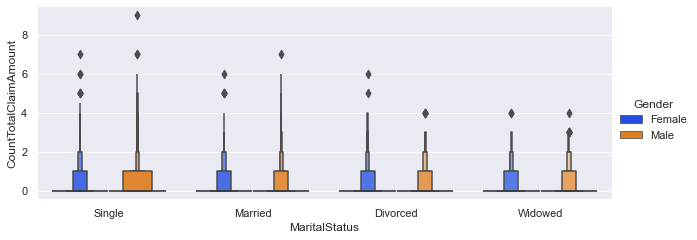

In [14]:
#Claim size and count per gender and marital status distribution
sns.catplot(x="MaritalStatus", y="SumTotalClaimAmount", hue="Gender",
                 data=df_copy, kind='boxen', height=3.5, aspect=2.5, palette='bright')
sns.catplot(x="MaritalStatus", y="CountTotalClaimAmount", hue="Gender",
                 data=df_copy, kind='boxen', height=3.5, aspect=2.5, palette='bright')

We observe that singles had more claim amount and count as compared to the other marital status with males claiming more than females in each of the status.

### Industry Type

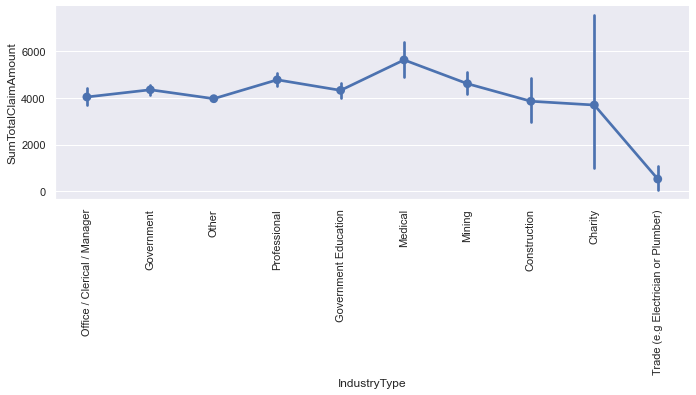

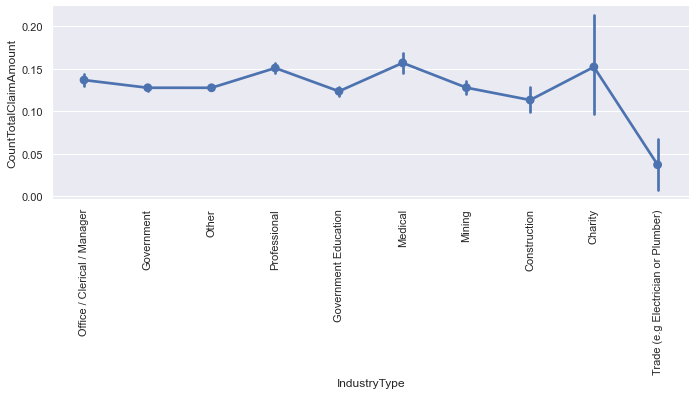

In [15]:
#Claims size and count per industry type distribution
sns.catplot(x="IndustryType", y="SumTotalClaimAmount",
            data=df_copy, kind='point', height=3.5, aspect=3)
plt.xticks(rotation=90)
sns.catplot(x="IndustryType", y="CountTotalClaimAmount",
            data=df_copy, kind='point', height=3.5, aspect=3)
plt.xticks(rotation=90)
plt.show()

From the plot above we observe that customers in the medical industry had the highest claim amounts and claim counts with those in the trade industry having the lowest claim amounts.

### Vehicle Make

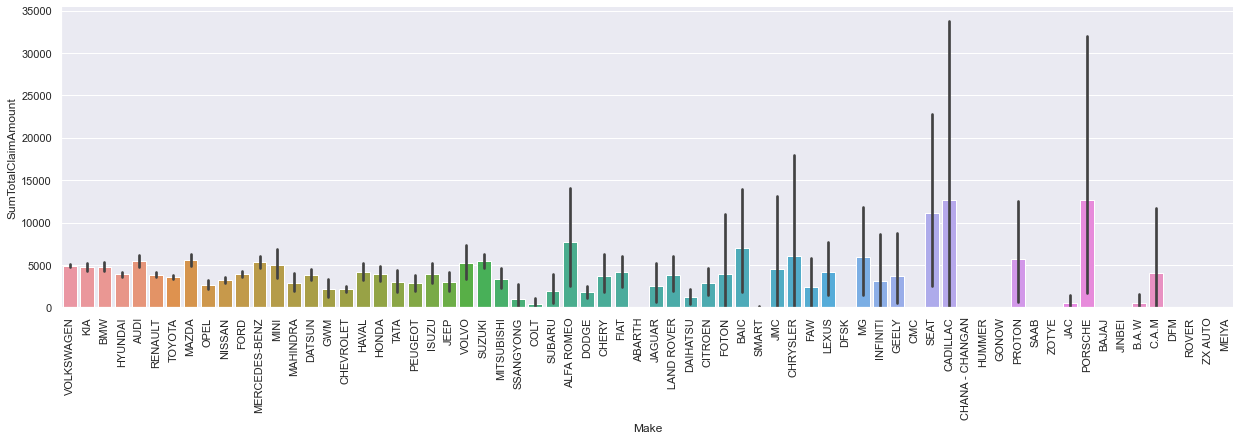

In [16]:
#Claims amount versus make of vehicle
sns.catplot(x="Make", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3.5)
plt.xticks(rotation=90)
plt.show()

We observe that Porsche owners had the highest claim amounts with owners of other makes such as CMC, DFM having zero claim amounts. Cadillac owners follow closely with Seat owners coming in third.

### Vehicle Colour

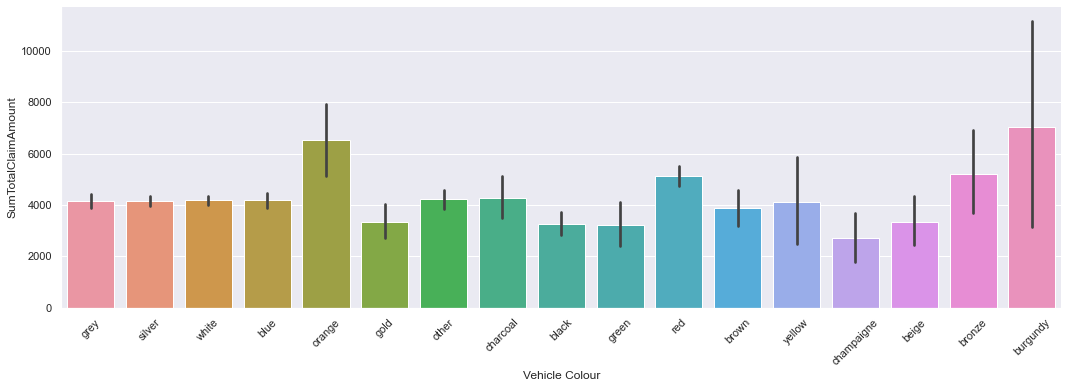

In [17]:
#Claim Amount Versus Vehicle Colour
sns.catplot(x="Colour", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3)
plt.xticks(rotation=45)
plt.xlabel('Vehicle Colour')
plt.show()

We observe that burgundy colored vehicle owners claimed a higher amount with champaigne colored vehicle owners claiming the least amount.

### Vehicle Transmission 

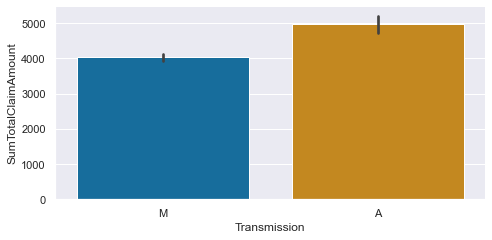

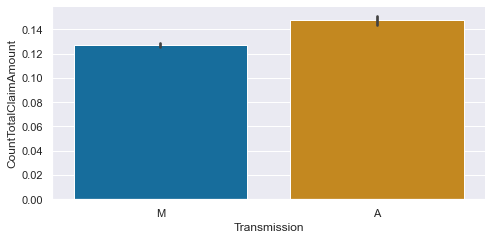

In [18]:
#Claim Amount Versus Transmission
sns.catplot(x="Transmission", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=3.5, aspect=2, palette='colorblind')

sns.catplot(x="Transmission", y="CountTotalClaimAmount",
            data=df_copy, kind='bar', height=3.5, aspect=2, palette='colorblind')

We observe that automatic vehicles have more claim amounts and claim counts as compared to manual vehicles.

### Vehicle Body Type

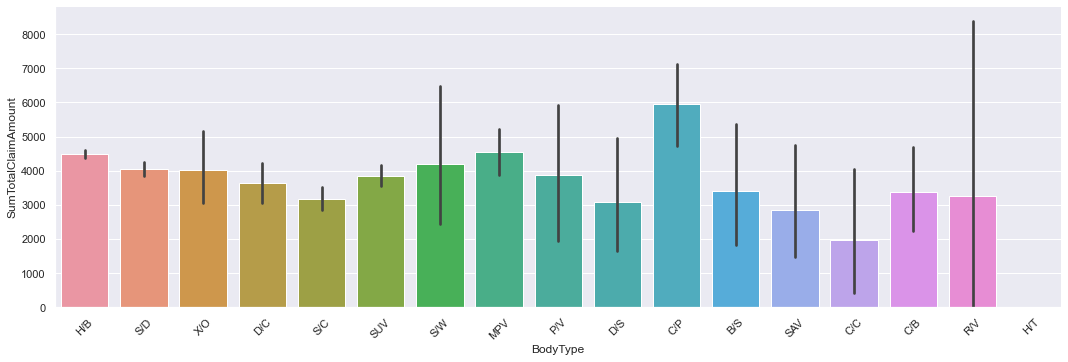

In [19]:
#Body Type
sns.catplot(x="BodyType", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3)
plt.xticks(rotation=45)
plt.show()

From the above plot we observe that C/P body type vehicles have the highest claim amount with C/C having the lowest claim amount.

### Policy Main Driver Annual Mileage

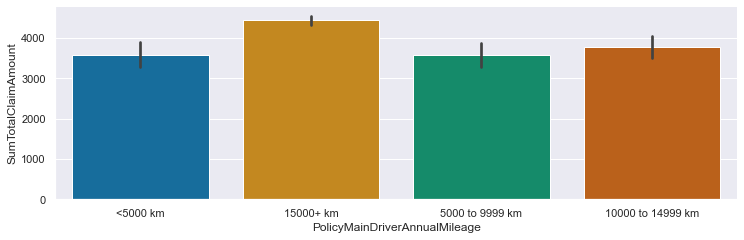

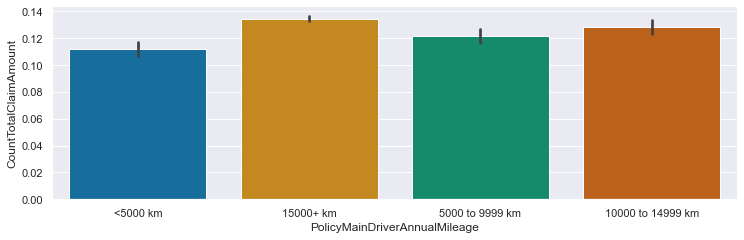

In [20]:
#Claim amount and claim count versus policy main driver annual mileage
sns.catplot(x="PolicyMainDriverAnnualMileage", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=3.5, aspect=3, palette='colorblind')

sns.catplot(x="PolicyMainDriverAnnualMileage", y="CountTotalClaimAmount",
            data=df_copy, kind='bar', height=3.5, aspect=3, palette='colorblind') 



We observe that drivers with annual mileage of less than 15000 had the highest claim amounts and claim count. Drivers with an annual mileage of between 5000 and 9999 km had the least claim amount. Drivers with an annual mileage of 5000 km and below had the least claim count. 

### Policy Main Driver License Duration Range

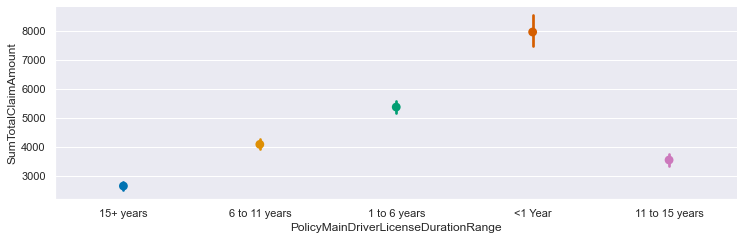

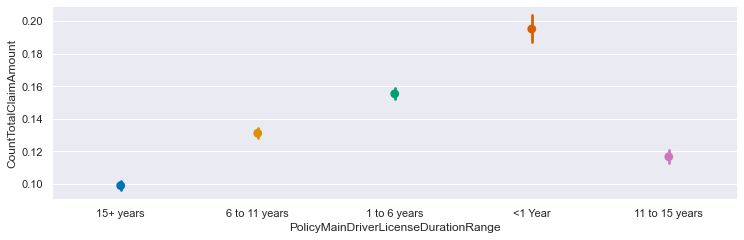

In [21]:
#Claim Amount Versus Policy Main Driver License Duration Range
sns.catplot(x="PolicyMainDriverLicenseDurationRange", y="SumTotalClaimAmount",
            data=df_copy, kind='point', height=3.5, aspect=3, palette='colorblind')

sns.catplot(x="PolicyMainDriverLicenseDurationRange", y="CountTotalClaimAmount",
            data=df_copy, kind='point', height=3.5, aspect=3, palette='colorblind')

We observe that drivers with license duration range of less than 1 year had the highest claim amount and claim count. Drivers with license duration range of more than 15 years had the least claim amount and claim count.

### Vehicle Transmission 

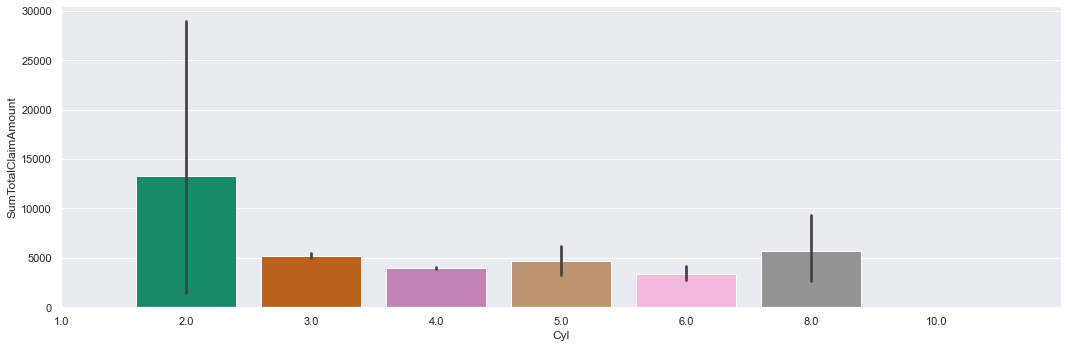

In [22]:
#Claim Amount Versus Cylinder Capacity
sns.catplot(x="Cyl", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3, palette='colorblind')

plt.xlim([1,9])
plt.show()

From the figure above we observe that vehicles with two cylinders capacity had the highest claim amount followed by those with eight cylinders. Six cylinder capcity vehicles had the lowest claim amount.

### Policy Status

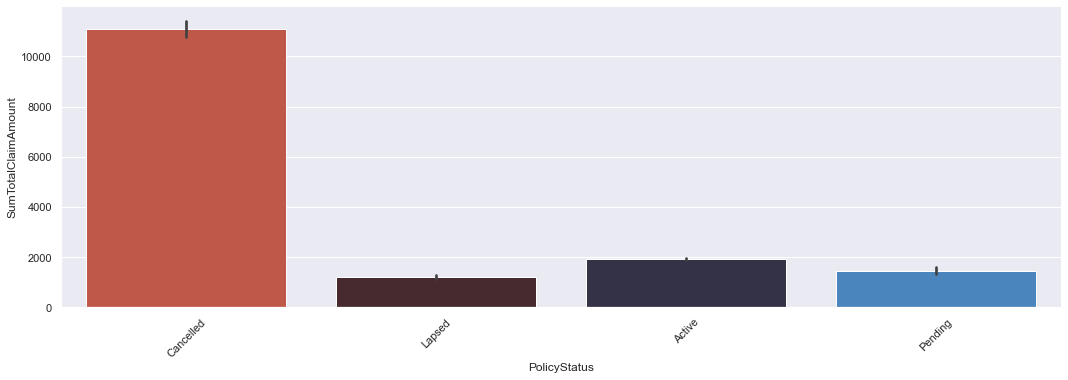

In [23]:
#Claim Amount Versus Policy Status
sns.catplot(x="PolicyStatus", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3, palette='icefire_r')
plt.xticks(rotation=45)
plt.show()

Claim amount is highest among cancelled policy status and lowest in the lapsed policy status

### Person Province 

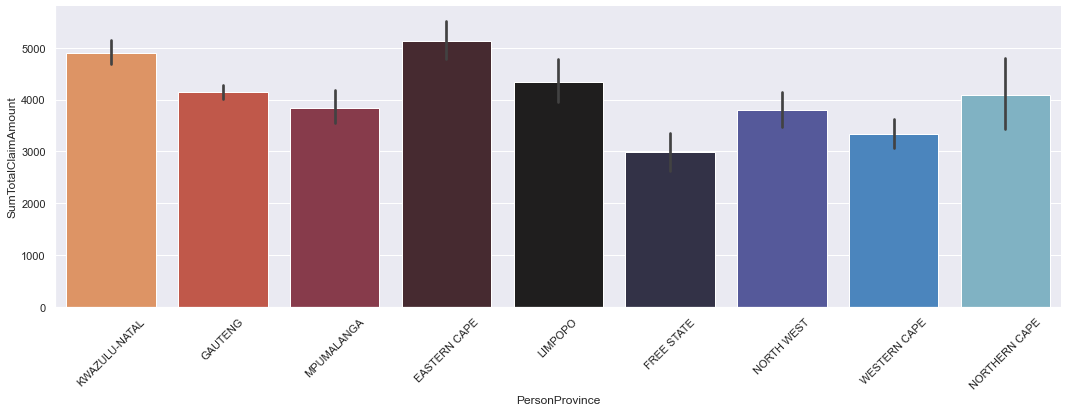

In [24]:
#Claim Amount Versus Person Province
sns.set(style ="darkgrid")
sns.catplot(x="PersonProvince", y="SumTotalClaimAmount",
            data=df_copy, kind='bar', height=5, aspect=3, palette='icefire_r')
plt.xticks(rotation=45)
plt.show()

Eastern Cape province had the highest claim amounts followed by KZN. Free State province had the least claim amount.

## Numerical Features
Next we will investigate how numerical features affect the claim amount.

### Premium
Firstly, we investigate whether the premium a customer pays affects the claim amount

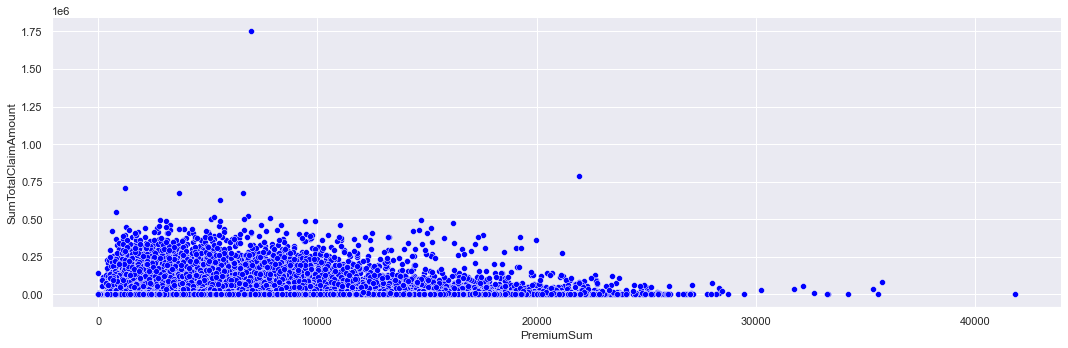

In [25]:
#Claim Amount Versus Premium
sns.set(style ="darkgrid")
sns.relplot(x="PremiumSum", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

There doesn't seem to be a linear relationship between premium and claim amount.

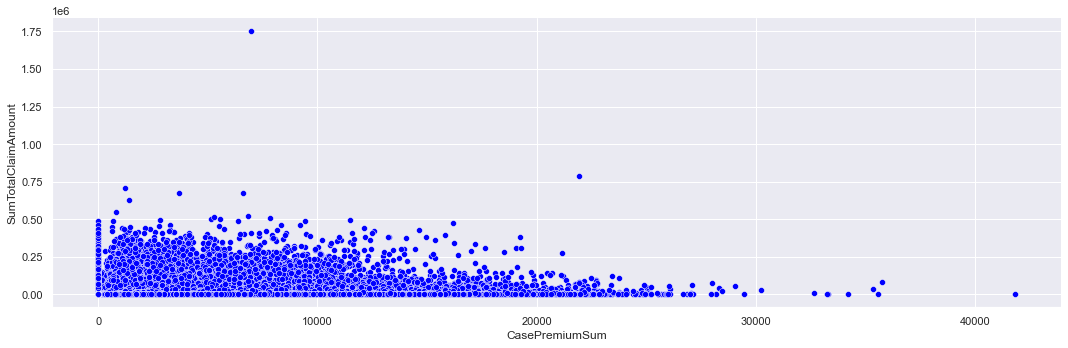

In [26]:
#Claim Amount Versus Case Premium
sns.set(style ="darkgrid")
sns.relplot(x="CasePremiumSum", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

There doesn't seem to be a linear relationship between case premium and claim amount.

### Age 
Next we investigate how claim amounts vary with age of policyholders.

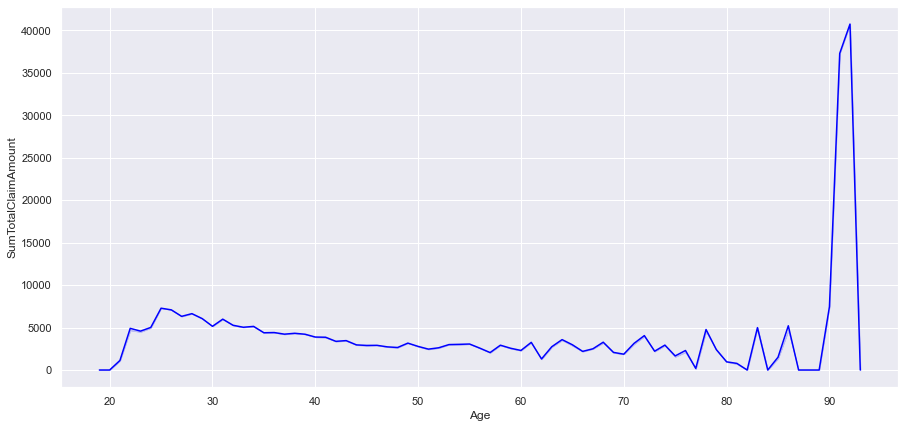

In [27]:
#Claim amount versus policyholder age
plt.figure(figsize=(15,7))
sns.lineplot(x=df_copy["Age"], y=df_copy["SumTotalClaimAmount"],ci=0, color='blue')
plt.show()

We observe that claim amount was moderately high among customers in mid-twenties and then declined steadily before shooting upwards among clients aged 90 and finally falling.

### Vehicle year of manufacture
We investigate how claim amount varies with vehicle year of manufacture.

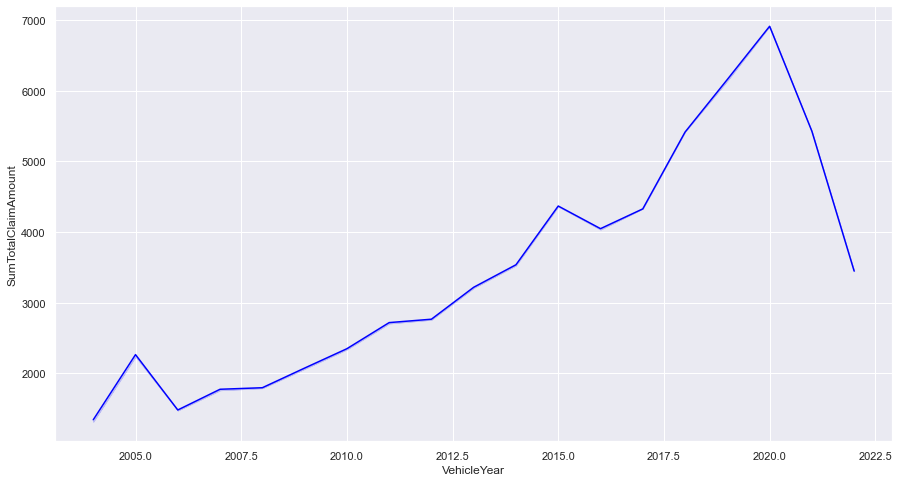

In [28]:
#Claim amount versus vehicle year of manufacture
plt.figure(figsize=(15,8))
sns.lineplot(x="VehicleYear", y="SumTotalClaimAmount",data = df_copy, ci=0, color='blue')
plt.show()

From the figure above we observe that claim amount rose with vehicle year of manufacture up to 2020. The claim amount then declined sharply for vehicles manufactured in 2021 and 2022.

### Previous Insurer
We investigate how claim amount varies with previous insurer excess and premium.

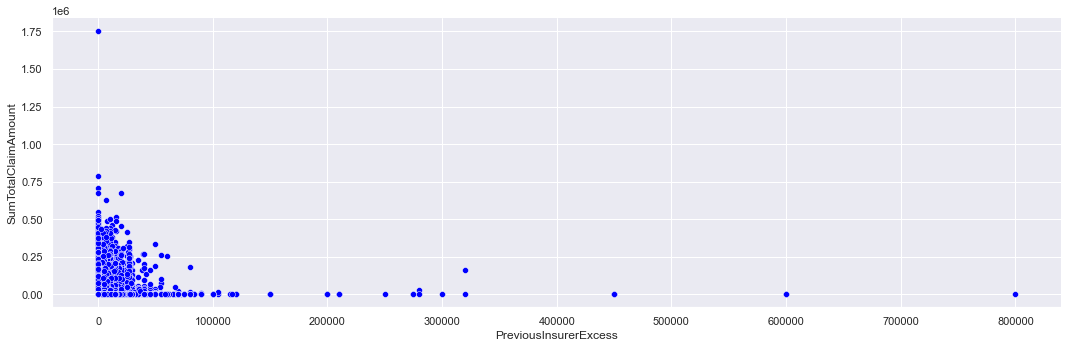

In [29]:
#Claim amount versus previous insurer excess
sns.set(style ="darkgrid")
sns.relplot(x="PreviousInsurerExcess", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

There is a negative linear relationship between Previous Insurer Excess and claim amount.

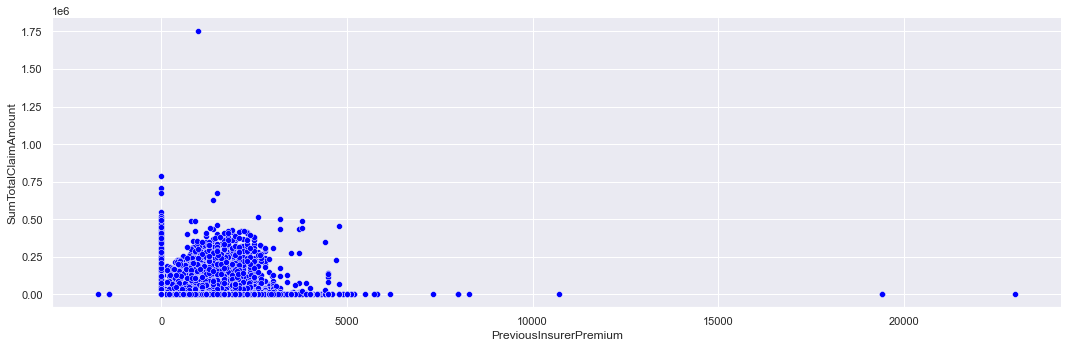

In [30]:
#Claim Amount Versus Previous Insurer Premium
sns.set(style ="darkgrid")
sns.relplot(x="PreviousInsurerPremium", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

From the plot we observe a negative linear relationship between Previous Insurer Premium and claim amount.

### Vehicle Cubic Capacity
We investigate how claim amount varies with vehicle cubic capacity.

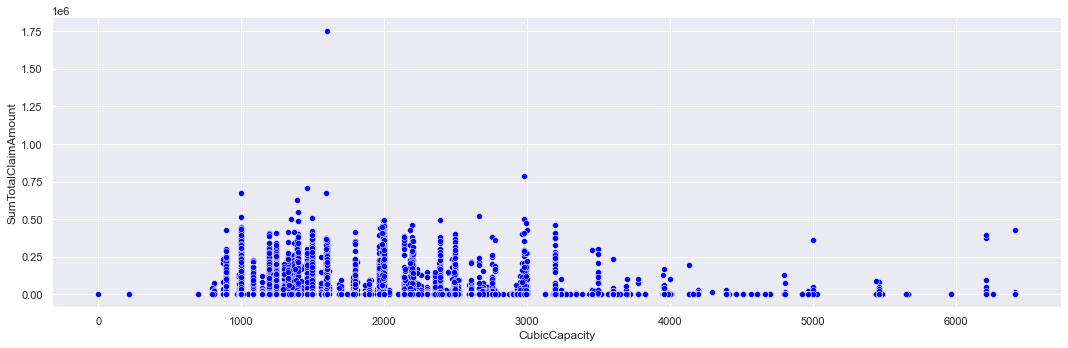

In [31]:
#Claim Amount Versus Vehicle Cubic Capacity
sns.set(style ="darkgrid")
sns.relplot(x="CubicCapacity", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

From the plot we observe a negative linear relationship between Vehicle Cubic Capacity and claim amount. The claim amount is highest among vehicles with 1000 to 3000cc and reduces for vehicles with higher capacity.

### Vehicle Battery Capacity (Kilowatts)
We investigate how claim amount varies with vehicle battery capacity.

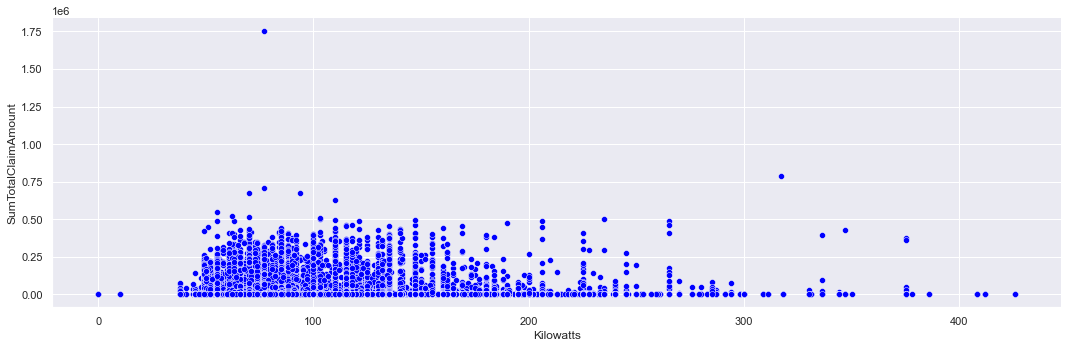

In [32]:
#Claim Amount Versus Kilowatts
sns.set(style ="darkgrid")
sns.relplot(x="Kilowatts", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

From the plot above a negative linear relationship between Vehicle kilowatts and claim amount. 

### Months Since Policy Inception
We investigate how claim amount varies with months since policy inception.

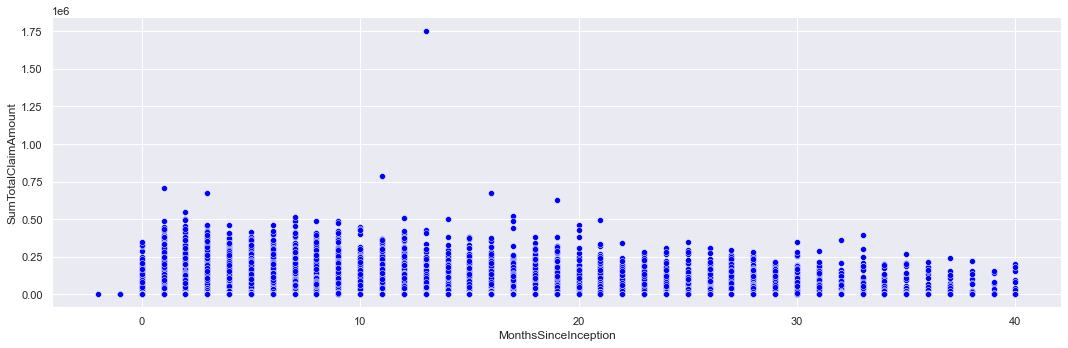

In [33]:
#Claim Amount Versus Months Since Inception
sns.set(style ="darkgrid")
sns.relplot(x="MonthsSinceInception", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

From the plot above we observe that claim amount decreases with increase in months since inception of policy. 

### Sum Assured
We investigate how claim amount varies with previous sum assured.

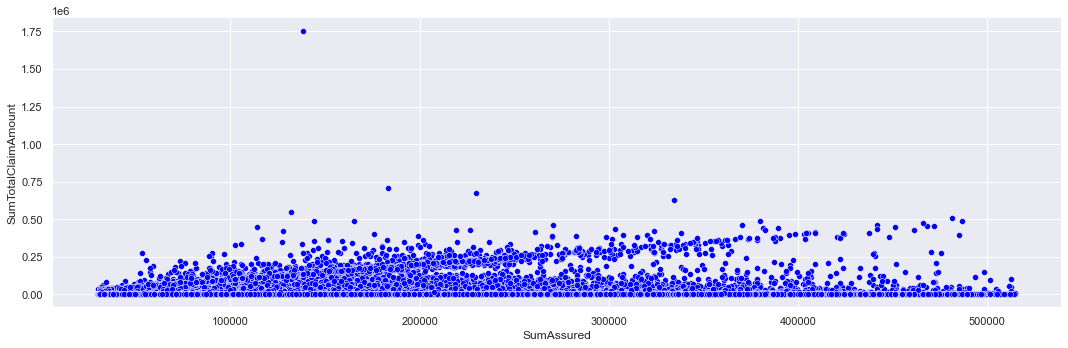

In [34]:
#Claim Amount Versus Sum Assured
sns.set(style ="darkgrid")
sns.relplot(x="SumAssured", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

We observe a positive linear relationship between sum assured and claim amount. 

### Mean Excess

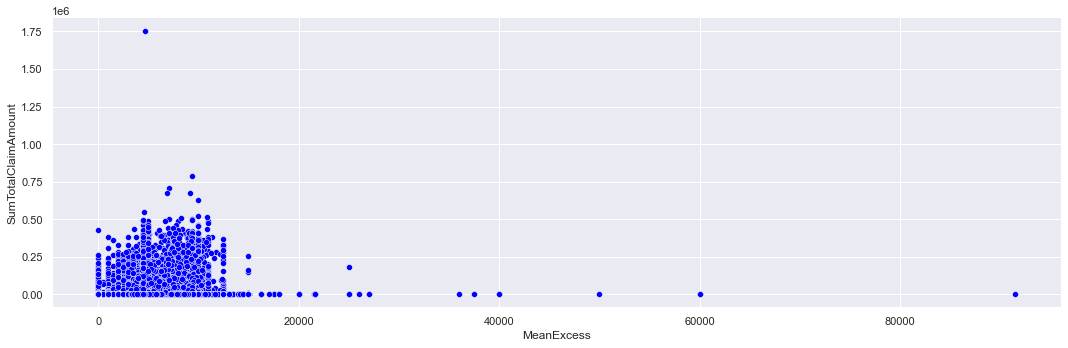

In [35]:
#Claim Amount Versus Mean Excess
sns.set(style ="darkgrid")
sns.relplot(x="MeanExcess", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

From the plot claim amount is highest for mean excess below 20000.

### Total Excess


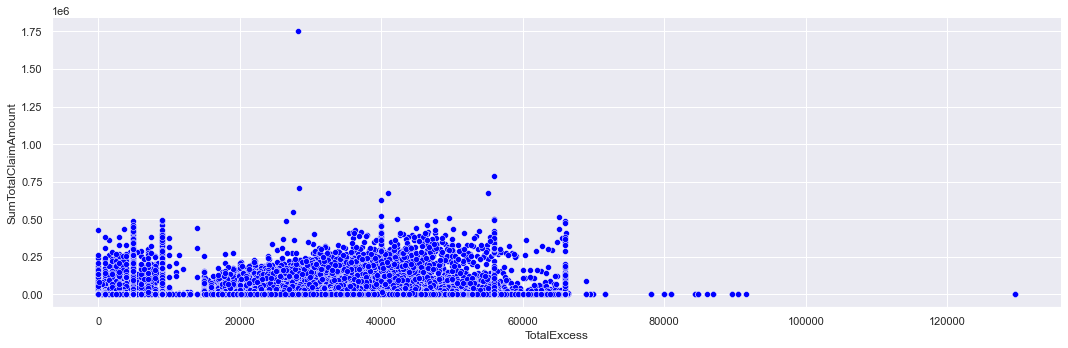

In [36]:
#Claim Amount Versus Total Excess
sns.set(style ="darkgrid")
sns.relplot(x="TotalExcess", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

There is no linear relationship between total excess and claim amount

### Excess Types Count


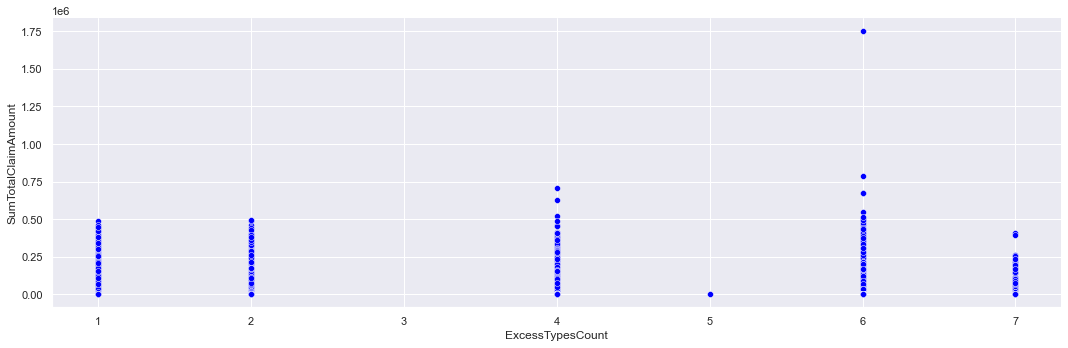

In [37]:
#Claim Amount Excess Types Count
sns.set(style ="darkgrid")
sns.relplot(x="ExcessTypesCount", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

We observe that claim amount is uniformly distributed among excess types count.

### Nominated Drivers Count


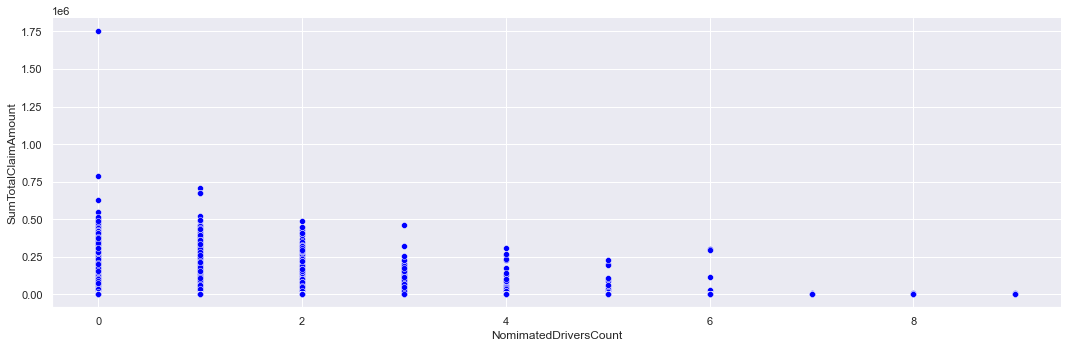

In [38]:
#Claim Amount Versus Nominated Drivers Count
sns.set(style ="darkgrid")
sns.relplot(x="NomimatedDriversCount", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

We observe a negative linear relationship between nominated drivers count and claim amount.

### Nominated Drivers Under 30 Count


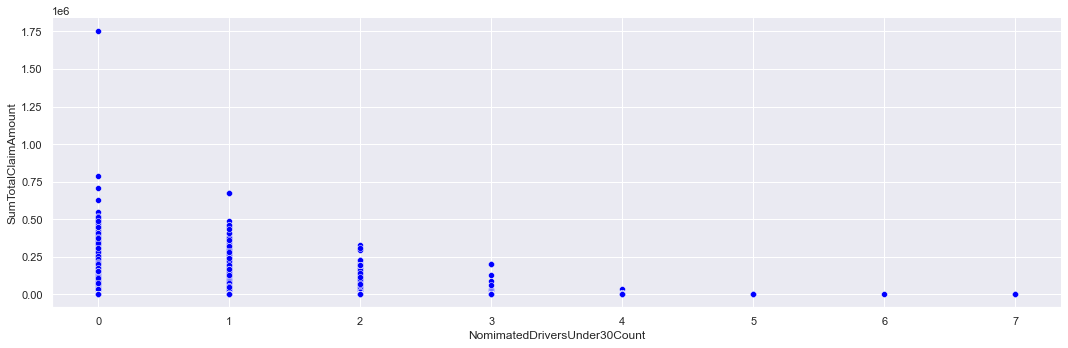

In [39]:
#Claim Amount Versus Nominated Drivers Under 30 Count
sns.set(style ="darkgrid")
sns.relplot(x="NomimatedDriversUnder30Count", y="SumTotalClaimAmount", data=df_copy, height=5, aspect=3, color='blue')

We observe a negative linear relationship between nominated drivers under 30 count and claim amount.

<a id='feat_eng'></a><br>
## 4. Data Preprocessing
[Back to Table of Contents](#Table_Contents)
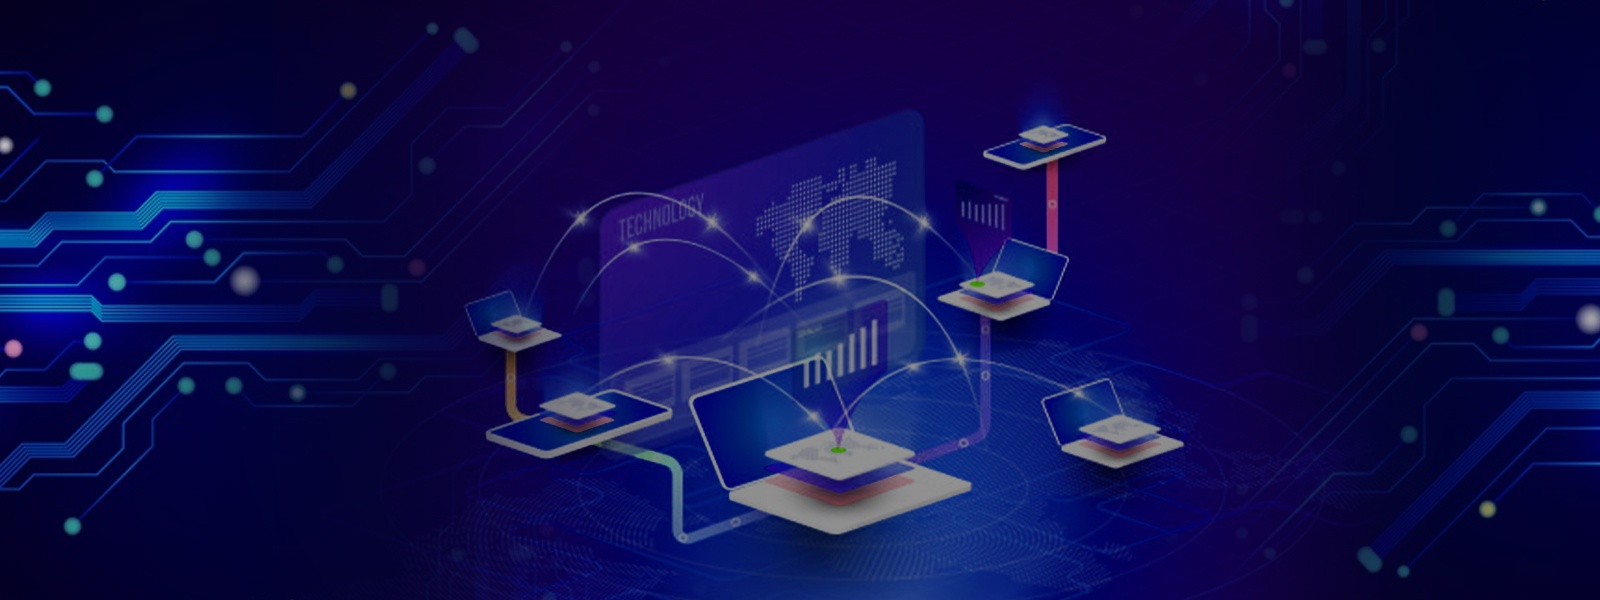

In this section we select and transform the most relevant features from the data so as to create a good machine learning model.


### Loading Data
We make a copy of the dataframe so as to avoid making changes to the original data.

In [106]:
#Make copy of df
df_copy = df.copy()
df_copy.shape

(262990, 45)

### Dropping Unnecessary Columns
We drop columns that will not be used in creating our model.

In [107]:
#Drop irrelevant columns
df_copy = df_copy.drop(['ClaimId ', 'CountTotalClaimAmount', 'PremiumSum', 'CasePremiumSum', 'TotalPremiumPaymentCount', 
              'PaymentDueDate', 'IsMemberPayer', 'PolicyStatus', 0.5865768182345752], axis=1)
df_copy.shape

(262990, 36)

### Dealing With Missing Values
We check for columns with missing values and drop those with 40% and above missing values. For those below the 40% threshold we impute with mean for numerical columns and mode for categorical columns. For 'SumTotalClaimAmount' and 'PreviousInsurerPremium' we impute with zero.
We also drop rows with more than 50% missing values.

In [108]:
#Check for missing values
df_copy.isna().mean()

PolicyId                                0.000000
SumTotalClaimAmount                     0.895844
PreviousInsurerExcess                   0.000103
PreviousInsurerPremium                  0.000110
EmploymentType                          0.010099
Employer                                0.972296
Occupation                              0.008540
IndustryType                            0.015708
Gender                                  0.000030
BirthDt                                 0.000023
MaritalStatus                           0.000023
Make                                    0.000023
Model                                   0.000023
Colour                                  0.000023
Transmission                            0.000023
VehicleType                             0.000023
BodyType                                0.000023
CubicCapacity                           0.000023
Cyl                                     0.000023
Kilowatts                               0.000023
VehicleYear         

In [109]:
#Drop columns with 40% and above missing values
df_copy = df_copy.drop(['Employer', 'MonthsSinceInception', 'DaysSinceInception'], axis=1)
df_copy.shape

(262990, 33)

In [110]:
#Impute missing values
df_copy['SumTotalClaimAmount'].fillna(0, inplace=True)
df_copy['PreviousInsurerPremium'].fillna(0, inplace=True)
df_copy['SumAssured'].fillna(df_copy['SumAssured'].mean(), inplace=True)
df_copy['PreviousInsurerExcess'].fillna(df_copy['PreviousInsurerExcess'].mean(), inplace=True)
df_copy['EmploymentType'].fillna(df_copy['EmploymentType'].mode()[0], inplace=True)
df_copy['Occupation'].fillna(df_copy['Occupation'].mode()[0], inplace=True)
df_copy['IndustryType'].fillna(df_copy['IndustryType'].mode()[0], inplace=True)


### Dropping Redundant Columns
We drop 'Area' column since it is almost similar to 'PersonProvince' which has much less categories and missing values.

In [111]:
#Drop redundant columns 
df_copy = df_copy.drop('Area', axis=1)
df_copy.shape

(262990, 32)

### Feature Engineering
We use the existing data to create new variables so as to enhance model accuracy. We create 'Exposure' feature from policy commencement date and policy end date. This feature will be used as a sample weight in the XGBoost model. We also create 'Age' column from the birth date column. This is a more useful feature in the modelling process as compared to the birth date.


In [112]:
#Convert policy end date to datetime
df_copy['PolicyEndDate'] = df_copy['PolicyEndDate'].astype('datetime64[ns]')

#Calculate exposure
df_copy["Exposure"] = [(-1*round((x-y).total_seconds()/(60*60*24))/365) 
                 if pd.isna(y)==False and (-1*round((x-y).total_seconds()/(60*60*24))/365)<1 
                 else 1 for x,y in zip(df_copy["CommencementDt"],df_copy["PolicyEndDate"])]
df_copy = df_copy[df_copy["Exposure"] > 0]

In [113]:
#Create 'Age' column
now = pd.Timestamp('now')
df_copy['BirthDt'] = pd.to_datetime(df_copy['BirthDt'], format='%m%d%y')   
df_copy['BirthDt'] = df_copy['BirthDt'].where(df_copy['BirthDt'] < now, df_copy['BirthDt'] -  np.timedelta64(100, 'Y'))   
df_copy['Age'] = (now - df_copy['BirthDt']).astype('<m8[Y]')

### Dropping Date Columns
We drop all the date columns as they will not be needed in the modelling process.

In [114]:
df_copy.drop(['BirthDt', 'CommencementDt','PolicyEndDate'], axis=1, inplace=True)

In [116]:
#Delete rows with multiple missing values (50% threshold)
df_copy = df_copy.dropna(axis=0)

### Extracting Vehicle Model First Name
We extract the first name of the vehicle model so as to reduce the number of categories. This will not lead to much information loss since most vehicles with similar first names e.g 'POLO' are usually not very different.

In [119]:
#Extract first name of vehicle model
df_copy['Model'] = df_copy.Model.str.split().str.get(0)

### Selecting Top Categories and Replacing Rest With 'Other'
Some of the categorical features have a lot of categories and most of those categories have low frequency. Therefore, we extract only the top n categories by frequency and replace all the other categories by 'Other'. This will help in dimensionality reduction of our dataset and enhance our model's performance(accuracy).

In [120]:
#Select top categories and replace rest with other
cat_features = [i for i in df_copy.columns if df_copy.dtypes[i]=='object']
top_n = 19
for cat in cat_features:
    df_copy[cat] = df_copy[cat].str.lower()
    top_cats = df_copy[cat].value_counts().head(top_n).index.tolist()
    df_copy.loc[~df_copy[cat].isin(top_cats), cat] = 'Other'

###  Binning of Numerical Features

To facilitate easier linear modelling, we bin the numerical columns. 

In [121]:
#Numerical columns binarization
n_bins = 20
numeric = [i for i in list(df_copy.columns) if df_copy.dtypes[i]!='object' 
                if i not in ['SumTotalClaimAmount', 'Exposure', 'PolicyId']]

binarizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

df_copy.loc[:, numeric] = binarizer.fit_transform(X=df_copy[numeric])

### One Hot Encoding of Categorical Features
We convert categorical features into a format that can be fed into our machine learning algorithms to improve prediction accuracy. This is because machine learning models require numeric input variables.

In [122]:
#Categorical columns hot encoding
category = [i for i in df_copy.columns if df_copy.dtypes[i]=='object']
for col in category:
    one_hot = pd.get_dummies(df_copy[col], prefix=col, prefix_sep='_', drop_first=True)
    df_copy = df_copy.join(one_hot)
    df_copy.drop([col], inplace=True, axis=1)



<a id='model'></a><br>
## 5. Model Building
[Back to Table of Contents](#Table_Contents)

In this section we build machine learning models to predict insurance claim amount given input features. We will train a linear regression model and Extreme Gradient Boosting (XGBoost) regression model and assess their performance to determine which one performs better.

### Splitting Features and Target Variable
We first split our data into input variables (independent variables) and the target variable (dependent variable).

In [123]:
#Assign target variable
y = df_copy["SumTotalClaimAmount"]
X = df_copy.drop(["SumTotalClaimAmount", "PolicyId"], axis=1)


### Splitting Into Train, Val, and Test Sets
Next, we split the input variables into training, validation and testing sets to prevent our models from overfitting and to accurately evaluate the models.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=1)

### Scaling Numerical Features
Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. Therefore we scale our numerical columns using the MinMax Scaler.


In [125]:
#Scaling numerical columns

scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)

categorical = [i for i in list(df_copy.columns) if i not in numeric 
                if i not in ['SumTotalClaimAmount', 'Exposure', 'PolicyId']]
X_train = pd.concat([pd.DataFrame(scaler.fit_transform(X_train[numeric]), columns=numeric), 
                     X_train["Exposure"].reset_index(drop=True), X_train[categorical].reset_index(drop=True)], axis=1)

X_val = pd.concat([pd.DataFrame(scaler.transform(X_val[numeric]), columns=numeric), 
                   X_val["Exposure"].reset_index(drop=True), X_val[categorical].reset_index(drop=True)], axis=1)

X_test = pd.concat([pd.DataFrame(scaler.transform(X_test[numeric]), columns=numeric), 
                    X_test["Exposure"].reset_index(drop=True), X_test[categorical].reset_index(drop=True)], axis=1)


### Fitting Linear Regression Model 
A linear model finds the best fit linear line between the target variable and the input features. We proceed to fit a linear regression model to our data and generate metrics to access perormance of the model.

In [156]:
### Modelling
lr_model = LinearRegression()

# Train the model using the training set
lr_model.fit(X_train.drop(['Exposure'], axis=1), y_train)

# Make predictions on the validation set
y_pred_lr = lr_model.predict(X_val.drop(['Exposure'], axis=1))

# Print root mean squared error on the validation set
print('RMSE on validation set:')
print(sqrt(mean_squared_error(y_val, y_pred_lr)))
print('')

# Print mean absolute error on the validation set
print('MAE on validation set:')
print(mean_absolute_error(y_val, y_pred_lr))
print('')

# Print mean absolute percentage error on the validation set
print('MAPE on validation set:')
print(mean_absolute_percentage_error(y_val, y_pred_lr))
print('')

# Print R squared on the validation set
print('R squared on validation set:')
print(r2_score(y_val, y_pred_lr))

RMSE on validation set:
24275.778329968387

MAE on validation set:
7721.093816953293

MAPE on validation set:
1.7357958189547315e+19

R squared on validation set:
0.011011422912180935


#### Actual Versus Predicted Claims Amount Distribution
We plot the predicted claim amount and the actual claim amount so as to observe their distributions.

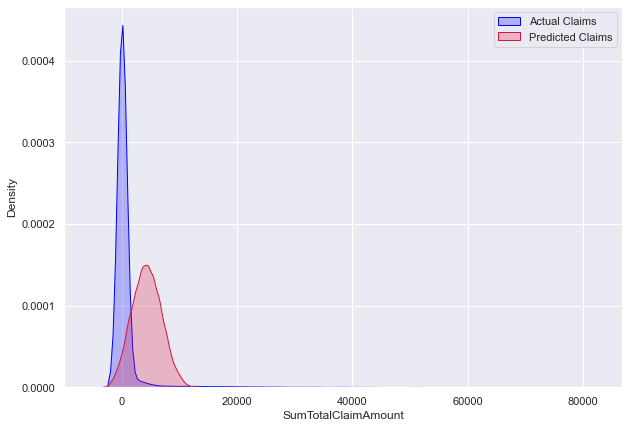

In [129]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.kdeplot(y_val[y_val<80000], color="blue", shade=True, label="Actual Claims")
sns.kdeplot(y_pred_lr[y_pred_lr<80000], color="crimson", shade=True, label="Predicted Claims")

plt.legend() 
plt.show()

We observe that the predicted claim amount follows a normal distribution while the actual claim amount is clearly not normally distributed.

In [157]:
#Pickle the trained model
pickle.dump(lr_model, open('linear_model.pkl', 'wb'))

### Fitting XGBoost Model

In [131]:
#Remove '<' in feature names
X_train.columns = X_train.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
X_val.columns = X_val.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
X_test.columns = X_test.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [153]:
#Model fitting
EXPOSURE_TRAIN = X_train["Exposure"]

xgb_model = XGBRegressor()
xgb_model.fit(X=X_train.drop(['Exposure'], axis=1).values, y = y_train.values, eval_metric = "rmse",
             eval_set= [(X_val.drop(['Exposure'], axis=1).values, y_val.values)], verbose=True, sample_weight=EXPOSURE_TRAIN)

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:24517.83123
[1]	validation_0-rmse:24399.53220
[2]	validation_0-rmse:24334.44419
[3]	validation_0-rmse:24283.06349
[4]	validation_0-rmse:24280.30484
[5]	validation_0-rmse:24270.28853
[6]	validation_0-rmse:24280.04205
[7]	validation_0-rmse:24291.82391
[8]	validation_0-rmse:24305.24750
[9]	validation_0-rmse:24313.05351
[10]	validation_0-rmse:24319.14976
[11]	validation_0-rmse:24333.52887
[12]	validation_0-rmse:24341.86445
[13]	validation_0-rmse:24345.70412
[14]	validation_0-rmse:24361.72149
[15]	validation_0-rmse:24364.60109
[16]	validation_0-rmse:24377.24050
[17]	validation_0-rmse:24379.20333
[18]	validation_0-rmse:24380.66151
[19]	validation_0-rmse:24389.39197
[20]	validation_0-rmse:24392.65510
[21]	validation_0-rmse:24385.64718
[22]	validation_0-rmse:24386.84348
[23]	validation_0-rmse:24380.64826
[24]	validation_0-rmse:24384.43272
[25]	validation_0-rmse:24394.53234
[26]	validation_0-rmse:24393.90554
[27]	validation_0-rmse:24393.16600
[28]	validation_0-rmse:24396.6

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

#### Metrics

In [137]:
# Make predictions on the training and validation sets
y_pred_xg = xgb_model.predict(X_val.drop(['Exposure'], axis=1))

# Print root mean squared error on the validation set
print('RMSE on validation set:')
print(sqrt(mean_squared_error(y_val, y_pred_xg)))
print('')

# Print mean absolute error on the validation set
print('MAE on validation set:')
print(mean_absolute_error(y_val, y_pred_xg))
print('')

# Print mean absolute percentage error on the validation set
print('MAPE on validation set:')
print(mean_absolute_percentage_error(y_val, y_pred_xg))
print('')

# Print explained variance score on the validation set
print('Explained variance score on validation set:')
print(explained_variance_score(y_val, y_pred_xg))

RMSE on validation set:
24714.138915724165

MAE on validation set:
7667.747682018389

MAPE on validation set:
1.6946073728604172e+19

Explained variance score on validation set:
-0.025027797935424312


#### Actual Versus Predicted Claims Amount Distribution
We plot the predicted claim amount and the actual claim amount so as to observe their distributions.

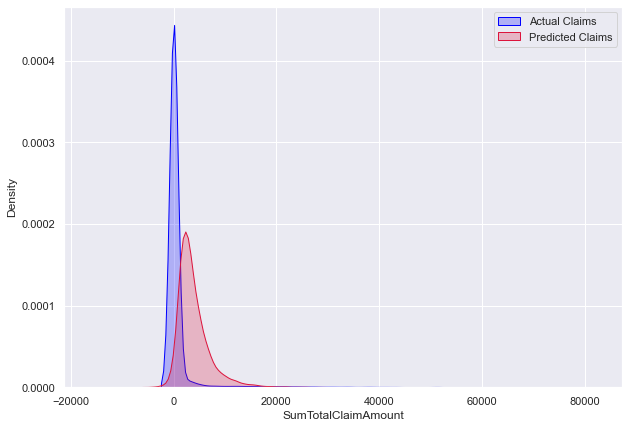

In [139]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.kdeplot(y_val[y_val<80000], color="blue", shade=True, label="Actual Claims")
sns.kdeplot(y_pred_xg[y_pred_xg<80000], color="crimson", shade=True, label="Predicted Claims")

plt.legend() 
plt.show()

We observe that both the actual and predicted claim amount have a similar distribution. However, the predicted amount is a bit shifted to the right.

In [155]:
#Pickle the trained model
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))

#### XGBoost Model Hyperparameter Tuning
We tune the hyperparameters of the XGBoost model to improve performance

In [66]:
'''
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train.drop(['Exposure'], axis=1), y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
'''

'\nparams = { \'max_depth\': [3,6,10],\n           \'learning_rate\': [0.01, 0.05, 0.1],\n           \'n_estimators\': [100, 500, 1000],\n           \'colsample_bytree\': [0.3, 0.7]}\nxgbr = XGBRegressor(seed = 20)\nclf = GridSearchCV(estimator=xgbr, \n                   param_grid=params,\n                   scoring=\'neg_mean_squared_error\', \n                   verbose=1)\nclf.fit(X_train.drop([\'Exposure\'], axis=1), y_train)\nprint("Best parameters:", clf.best_params_)\nprint("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))\n'

### Final Model Fitting
We use the optimal hyperparameters to train our XGBoost as the final model. Since the amount payed out over the insurance contract is often assumed to be Tweedie distributed, we use Tweedie as objective in the XGBoost model. 

In [143]:
final_model = XGBRegressor(
 learning_rate =0.05,
 n_estimators=500,
 max_depth=3,
 objective='reg:tweedie',
 colsample_bytree=0.3)
final_model.fit(X=X_train.drop(['Exposure'], axis=1).values, y = y_train.values, eval_metric = "rmse",
             eval_set= [(X_val.drop(['Exposure'], axis=1).values, y_val.values)], verbose=True, sample_weight=EXPOSURE_TRAIN)

C:\Users\Hudson\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-rmse:24771.24170
[1]	validation_0-rmse:24771.23158
[2]	validation_0-rmse:24771.22087
[3]	validation_0-rmse:24771.20860
[4]	validation_0-rmse:24771.19538
[5]	validation_0-rmse:24771.18104
[6]	validation_0-rmse:24771.16501
[7]	validation_0-rmse:24771.14665
[8]	validation_0-rmse:24771.12673
[9]	validation_0-rmse:24771.10502
[10]	validation_0-rmse:24771.08078
[11]	validation_0-rmse:24771.05412
[12]	validation_0-rmse:24771.02429
[13]	validation_0-rmse:24770.99121
[14]	validation_0-rmse:24770.95540
[15]	validation_0-rmse:24770.91584
[16]	validation_0-rmse:24770.87152
[17]	validation_0-rmse:24770.82275
[18]	validation_0-rmse:24770.76848
[19]	validation_0-rmse:24770.70954
[20]	validation_0-rmse:24770.64383
[21]	validation_0-rmse:24770.57147
[22]	validation_0-rmse:24770.49087
[23]	validation_0-rmse:24770.40230
[24]	validation_0-rmse:24770.30473
[25]	validation_0-rmse:24770.19682
[26]	validation_0-rmse:24770.07803
[27]	validation_0-rmse:24769.94641
[28]	validation_0-rmse:24769.8

[231]	validation_0-rmse:24252.44493
[232]	validation_0-rmse:24252.10916
[233]	validation_0-rmse:24252.21833
[234]	validation_0-rmse:24251.86872
[235]	validation_0-rmse:24251.44963
[236]	validation_0-rmse:24251.08977
[237]	validation_0-rmse:24250.97571
[238]	validation_0-rmse:24250.70562
[239]	validation_0-rmse:24250.49124
[240]	validation_0-rmse:24250.47952
[241]	validation_0-rmse:24250.31019
[242]	validation_0-rmse:24250.34410
[243]	validation_0-rmse:24249.96034
[244]	validation_0-rmse:24249.70479
[245]	validation_0-rmse:24249.48002
[246]	validation_0-rmse:24249.18862
[247]	validation_0-rmse:24249.15927
[248]	validation_0-rmse:24249.10344
[249]	validation_0-rmse:24248.89873
[250]	validation_0-rmse:24248.93608
[251]	validation_0-rmse:24248.77814
[252]	validation_0-rmse:24248.88856
[253]	validation_0-rmse:24248.43112
[254]	validation_0-rmse:24248.42113
[255]	validation_0-rmse:24248.14356
[256]	validation_0-rmse:24247.89469
[257]	validation_0-rmse:24248.14792
[258]	validation_0-rmse:2424

[459]	validation_0-rmse:24236.49968
[460]	validation_0-rmse:24236.49010
[461]	validation_0-rmse:24236.65256
[462]	validation_0-rmse:24236.65188
[463]	validation_0-rmse:24236.88511
[464]	validation_0-rmse:24236.78622
[465]	validation_0-rmse:24236.69144
[466]	validation_0-rmse:24236.69469
[467]	validation_0-rmse:24236.65523
[468]	validation_0-rmse:24236.42106
[469]	validation_0-rmse:24236.36411
[470]	validation_0-rmse:24236.37279
[471]	validation_0-rmse:24236.40229
[472]	validation_0-rmse:24236.44837
[473]	validation_0-rmse:24236.31780
[474]	validation_0-rmse:24236.30497
[475]	validation_0-rmse:24236.28985
[476]	validation_0-rmse:24236.30906
[477]	validation_0-rmse:24236.24205
[478]	validation_0-rmse:24236.36858
[479]	validation_0-rmse:24236.26288
[480]	validation_0-rmse:24236.18295
[481]	validation_0-rmse:24236.19361
[482]	validation_0-rmse:24236.14153
[483]	validation_0-rmse:24236.15772
[484]	validation_0-rmse:24236.16589
[485]	validation_0-rmse:24236.14183
[486]	validation_0-rmse:2423

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, objective='reg:tweedie', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [145]:
# Make predictions on the training and validation sets
y_pred_final = final_model.predict(X_val.drop(['Exposure'], axis=1))

# Print root mean squared error on the validation set
print('RMSE on validation set:')
print(sqrt(mean_squared_error(y_val, y_pred_final)))
print('')

# Print mean absolute error on the validation set
print('MAE on validation set:')
print(mean_absolute_error(y_val, y_pred_final))
print('')

# Print mean absolute percentage error on the validation set
print('MAPE on validation set:')
print(mean_absolute_percentage_error(y_val, y_pred_final))
print('')

# Print explained variance score on the validation set
print('Explained variance score on validation set:')
print(explained_variance_score(y_val, y_pred_final))

RMSE on validation set:
24236.531121263393

MAE on validation set:
7414.448558177289

MAPE on validation set:
1.5940256806943726e+19

Explained variance score on validation set:
0.014293653056312472


We observe that the metrics have improved and therefore our model performs better.

#### Actual Versus Predicted Claims Amount Distribution
We plot the predicted claim amount and the actual claim amount so as to observe their distributions.

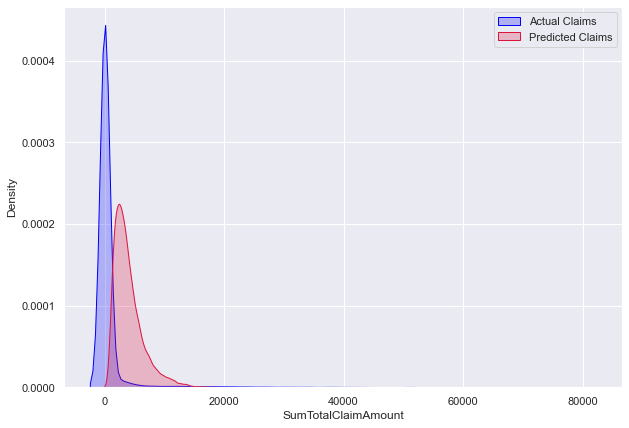

In [146]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.kdeplot(y_val[y_val<80000], color="blue", shade=True, label="Actual Claims")
sns.kdeplot(y_pred_final[y_pred_final<80000], color="crimson", shade=True, label="Predicted Claims")

plt.legend() 
plt.show()

We observe that both the actual and predicted claim amount have a similar distribution. However, the predicted amount is a bit shifted to the right.

In [151]:
#Pickle the trained model
pickle.dump(final_model, open('final_model.pkl', 'wb'))

<a id='conclusion'></a><br>
## 6. Conclusion
[Back to Table of Contents](#Table_Contents)

The current standard for claims modeling in the insurance industry has been relatively unchanged for decades, using outdated techniques like generalized linear models, spreadsheets and rule based algorithms to predict claims and set premiums. These outdated methods are plagued by inaccuracy and poor transparency necessitating search for better models.

In this project, we built two machine learning models that are able to insurance claim severity given input user and vehicle data. Based on the findings, the best performing model was the XGBoost model with RMSE score of 24236.53, MAE of 7414.45, 
MAPE of 1.59 and Explained variance score of 0.0143. This model can be used by interested companies to predict a customer's claim amount and therefore appropriately set their premium.

The results of this project can be improved upon by exploring other machine learning models and performing more feature engineering.

### Collaborators

#### Members:
1. Iniubong Efiong
2. Ubong Ben
3. Hudson Maina
4. Ekele Dinneya-Onuoha
5. Philip Ogunmola
6. Kehinde Orimoloye

#### Mentor: 
Stefan Ferreira


<a id='ref'></a><br>
## 7. References
[Back to Table of Contents](#Table_Contents)

1. Alamir, E., Urgessa, T., Hunegnaw, A., & Gopikrishna, T. (2021). Motor Insurance Claim Status Prediction using Machine    Learning Techniques. International Journal of Advanced Computer Science and Applications. https://doi.org/10.14569/IJACSA.2021.0120354

2. Maichel-Guggemoos, L., & Wagner, J. (2018). Profitability and Growth in Motor Insurance Business: Empirical Evidence from Germany. Geneva Papers on Risk and Insurance: Issues and Practice. https://doi.org/10.1057/s41288-017-0053-4
